In [1]:
import os
from lib import getAIMessage
from dotenv import load_dotenv
from pathlib import Path
import sys
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import MessagesState, StateGraph

working_dir = Path().cwd().parent
sys.path.insert(0, str(working_dir))

env_path = Path().cwd().parent.joinpath("sample.env")
load_dotenv(override=True, dotenv_path=env_path)
import sqlite3

conn = sqlite3.connect("../db/memory.db", check_same_thread=False )
memory = SqliteSaver(conn)
mem_config = {"configurable": {"thread_id": "1"}}

In [2]:
from langchain_core.messages import HumanMessage

model = os.getenv("GPT_MODEL")
llm = ChatOpenAI(model=model)

class State(MessagesState):
    pass

def agent1(state: State):
    return {"messages":[llm.invoke(state["messages"])]}

def agent2(state: State):
    return {"messages":[llm.invoke(state["messages"])]}



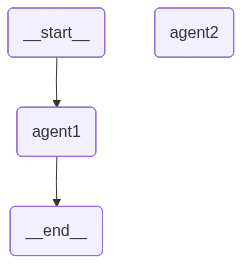

In [3]:
from IPython.core.display import Image
from langgraph.constants import START

g = StateGraph(State)
g.add_node(agent1)
g.add_node(agent2)


g.add_edge(START, "agent1")

gr  = g.compile(checkpointer=memory)

display(Image(gr.get_graph().draw_mermaid_png()))

In [4]:
msg = {"messages":[HumanMessage(content="Hello, I am Vj")]}
res =  gr.invoke(msg, config=mem_config)
getAIMessage(res)

"Hello again, Vj! How can I assist you today? If you're still interested in planning a trip or if you have something else in mind, just let me know!"

In [5]:
msg1 = {"messages":[HumanMessage(content="Who am I?")]}
for chunk in gr.stream(msg1, config= mem_config, stream_mode="values"):
    #print(chunk)
    for m in chunk["messages"]:
        m.pretty_print()

KeyError: 'agent1'

In [6]:
# stream responses from the graph using existing `gr` and `msg`

for chunk in gr.stream(msg1, config=mem_config, stream_mode="updates"):
    for node_name, node_data in chunk.items():
        for m in node_data.get("messages", []):
            try:
                m.pretty_print()
            except Exception as e:
                print(m)

================================== Ai Message ==================================

You are Vj! If there’s more you’d like to share about yourself or if you have specific questions or topics in mind, feel free to let me know!


In [28]:
msg2 = {"messages":[HumanMessage(content="My last quesiton")]}
for chunk in gr.stream(msg2, config=mem_config, stream_mode="values"):
    # if chunk["messages"]:
    #     print(chunk["messages"][-1].content)
    for ch in chunk["messages"]:
        print(ch.content, end="\n=============\n")

Hello, I am Vj
Hello, Vj! How can I assist you today?
Who am I?
You're Vj! Beyond that, I don't have personal information about you. If you'd like to share more about yourself or if there's something specific you want to discuss, feel free to let me know!
Who am I?
Who am I?
You are Vj! If you're looking for something more specific, such as your interests, experiences, or role in a certain context, please provide more details, and I'd be happy to help!
You are Vj! If you're looking for deeper insights or information about yourself, please share a bit more about what you're seeking—whether it's related to your interests, hobbies, or any other area, I'm here to help!
How do you know me?
I don’t have access to personal information about individuals unless it has been shared in the course of our conversation. I only know that you are Vj because you introduced yourself that way. If there’s something specific you’d like to discuss or ask about, feel free to let me know!
How do you know me?
I

In [34]:

msg2 = {"messages": [HumanMessage(content="My last quesiton")]}
async for event in gr.astream_events(msg2, config=mem_config, version="v2"):


Node: . Type: on_chain_start. Name: LangGraph


NotImplementedError: The SqliteSaver does not support async methods. Consider using AsyncSqliteSaver instead.
from langgraph.checkpoint.sqlite.aio import AsyncSqliteSaver
Note: AsyncSqliteSaver requires the aiosqlite package to use.
Install with:
`pip install aiosqlite`
See https://langchain-ai.github.io/langgraph/reference/checkpoints/#langgraph.checkpoint.sqlite.aio.AsyncSqliteSaverfor more information.